
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of ETFs.  Construct portfolios from the ETFs and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,21.67,49.19,37.90,17.56,17.11,13.65,8.31,18.15,17.56,0.97
1,DIA,DJIA ETF,US Stocks:Large Cap,24.63,50.99,34.72,14.30,16.81,12.13,8.35,18.44,14.30,0.78
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,26.78,40.43,43.48,25.32,25.88,19.87,12.12,19.72,25.32,1.28
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,21.83,44.55,41.23,17.70,17.39,14.23,8.79,19.02,17.70,0.93
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,30.58,19.93,59.20,12.81,15.82,21.76,13.93,25.17,12.81,0.51
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,2.37,40.92,49.15,13.06,14.12,17.68,11.59,23.37,13.06,0.56
6,IWD,Russell 1000 Value ETF,US Stocks:Value,26.50,49.56,39.07,12.68,12.21,12.58,8.20,19.69,12.68,0.64
7,IWF,Russell 1000 Growth ETF,US Stocks,15.37,43.11,38.81,22.10,21.78,17.45,10.61,19.26,22.10,1.15
8,RSP,S&P 500 Equal Weight ETF,US Stocks,26.56,55.09,44.71,16.18,15.31,13.60,8.72,21.38,16.18,0.76
9,SLY,S&P 600 Small Cap ETF,US Stocks:Small Cap,32.94,29.43,62.81,12.10,15.76,21.59,12.78,25.81,12.10,0.47


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank_filtered = rank
rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
13,XLC,S&P500 Communication Services Sector ETF,US Stocks:Communication Services,44.67,36.67,46.07,46.07,46.07,17.29,9.46,19.52,46.07,2.36
17,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,35.97,40.56,43.14,26.68,27.84,21.20,12.58,20.44,26.68,1.31
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,26.78,40.43,43.48,25.32,25.88,19.87,12.12,19.72,25.32,1.28
36,SHY,1-3 Year Treasury Bond ETF,US Bonds,0.45,0.39,0.20,2.69,1.62,0.38,0.21,1.15,2.69,2.34
32,VCSH,Short Term Corporate Bond ETF,US Bonds,3.39,3.11,2.85,4.60,3.13,1.17,0.66,3.05,4.60,1.51
33,AGG,US Aggregate Bond ETF,US Bonds,2.41,3.24,0.06,5.32,3.22,3.15,1.56,3.53,5.32,1.51
47,VNQ,Real Estate Index Fund ETF,Real Estate:Real Estate Funds,104.13,98.80,30.71,13.00,8.41,15.73,9.47,18.30,13.00,0.71
46,IYR,U.S. Real Estate ETF,Real Estate:REIT,108.09,105.06,29.11,12.48,9.10,15.09,9.12,18.26,12.48,0.68
23,VXUS,Total International Stock ETF,Global Stocks:EX-US,58.05,39.01,38.28,9.00,11.27,13.74,8.09,17.77,9.00,0.51
25,EFA,MSCI EAFE ETF,Global Stocks:Developed Markets,52.44,43.49,33.32,8.26,10.09,12.85,7.39,17.22,8.26,0.48


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'SPY': 0.50,
    'AGG': 0.50
}

# put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'SPY': 0.50,
    'BIL': 0.50
}

# top dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'XLK': 1/7,
    'IYR': 1/7,
    'VPL': 1/7,
    'FXY': 1/7,
    'PALL': 1/7,
    'BIL': 1/7,
    'SHY': 1/7
}

# 50% S&P 500, 50% long term treasury
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'SPY': 1/2,
    'TLT': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'SPY': 1/3,
    'AGG': 1/3,
    'JPST': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'VTI': 1/4,
    'SPY': 1/4,
    'QQQ': 1/4,
    'VXUS': 1/4   
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'SPY': 0.90,
    'BIL': 0.10
}

# https://www.forbes.com/sites/baldwin/2016/07/25/eight-famous-portfolios/#42c50d7d5cce
# american households: 25% real estate, 30% stocks, 30% fixed income, 5% cash, 10% alternatives
american_households_portfolio = {
    'Title': 'American Households Portfolio',
    'IYR': 0,
    'SPY': 0,
    'JPST': 0.43,
    'BIL': 0.51,
    'GLD': 0.06
}

# janet yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'JPST': 0.50,
    'SPY': 0.40,
    'BIL': 0.10
}

# risk off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'BIL': 1/3,
    'AGG': 1/3,
    'JPST': 1/3
}

# risk on: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'SPY': 1/3,
    'EEM':1/3,
}

# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Annual Returns'},
    'Asset Subclass':    {'weight_by': 'Equal'},
    'Investment Option': {'weight_by': 'Std Dev'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLC,XLK,QQQ,SHY,VCSH,AGG,VNQ,IYR,VXUS,EFA,...,BWX,IBND,CYB,FXC,FXF,PALL,GLD,DBP,JPST,Ranked Portfolio
Annual Returns,46.07,26.68,25.32,2.69,4.60,5.32,13.00,12.48,9.00,8.26,...,3.43,3.59,2.56,2.56,2.02,41.11,13.13,12.69,2.36,16.94
Std Dev,19.52,20.44,19.72,1.15,3.05,3.53,18.30,18.26,17.77,17.22,...,5.82,8.35,4.95,6.14,6.06,26.70,14.07,16.31,1.42,12.88
Sharpe Ratio,2.36,1.31,1.28,2.34,1.51,1.51,0.71,0.68,0.51,0.48,...,0.59,0.43,0.52,0.42,0.33,1.54,0.93,0.78,1.66,1.31
Weight,0.11,0.11,0.11,0.06,0.02,0.02,0.12,0.12,0.05,0.05,...,0.04,0.04,0.01,0.01,0.01,0.02,0.02,0.02,0.02,1.00
Worst Typical Down Year,7.03,-14.20,-14.12,0.39,-1.50,-1.74,-23.60,-24.04,-26.54,-26.18,...,-8.21,-13.11,-7.34,-9.72,-10.10,-12.29,-15.01,-19.93,-0.48,-8.83
Black Swan,-12.49,-34.64,-33.84,-0.76,-4.55,-5.27,-41.90,-42.30,-44.31,-43.40,...,-14.03,-21.46,-12.29,-15.86,-16.16,-38.99,-29.08,-36.24,-1.90,-21.71


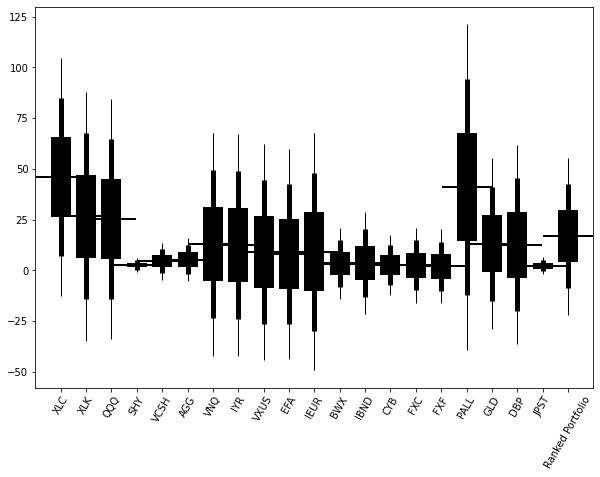

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

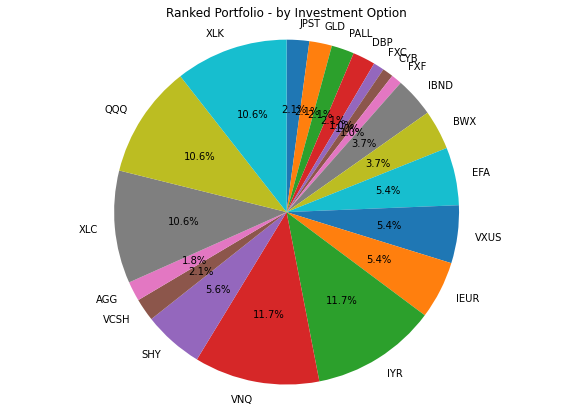

JPST   0.02
GLD    0.02
PALL   0.02
DBP    0.02
FXC    0.01
CYB    0.01
FXF    0.01
IBND   0.04
BWX    0.04
EFA    0.05
VXUS   0.05
IEUR   0.05
IYR    0.12
VNQ    0.12
SHY    0.06
VCSH   0.02
AGG    0.02
XLC    0.11
QQQ    0.11
XLK    0.11



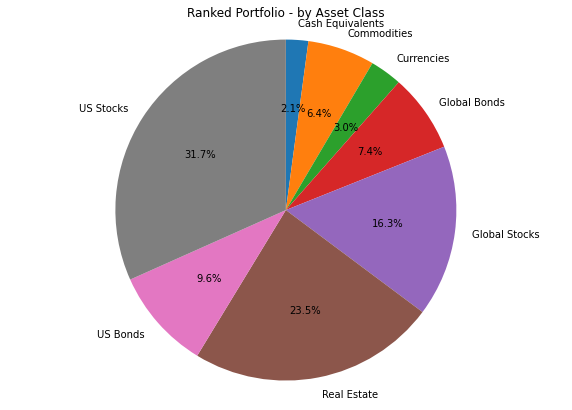

Cash Equivalents   0.02
Commodities        0.06
Currencies         0.03
Global Bonds       0.07
Global Stocks      0.16
Real Estate        0.23
US Bonds           0.10
US Stocks          0.32



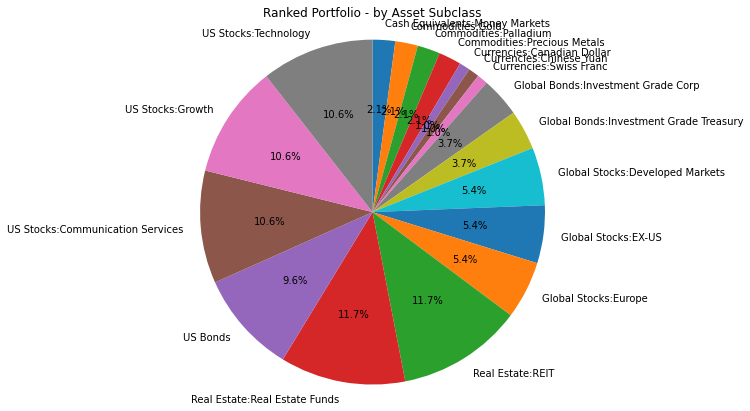

Cash Equivalents:Money Markets           0.02
Commodities:Gold                         0.02
Commodities:Palladium                    0.02
Commodities:Precious Metals              0.02
Currencies:Canadian Dollar               0.01
Currencies:Chinese Yuan                  0.01
Currencies:Swiss Franc                   0.01
Global Bonds:Investment Grade Corp       0.04
Global Bonds:Investment Grade Treasury   0.04
Global Stocks:Developed Markets          0.05
Global Stocks:EX-US                      0.05
Global Stocks:Europe                     0.05
Real Estate:REIT                         0.12
Real Estate:Real Estate Funds            0.12
US Bonds                                 0.10
US Stocks:Communication Services         0.11
US Stocks:Growth                         0.11
US Stocks:Technology                     0.11



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    XLC                            0.1056
    XLK                            0.1056
    QQQ                            0.1056
    SHY                            0.0565
    VCSH                           0.0213
    AGG                            0.0184
    VNQ                            0.1175
    IYR                            0.1175
    VXUS                           0.0542
    EFA                            0.0542
    IEUR                           0.0542
    BWX                            0.0371
    IBND                           0.0371
    CYB                            0.0101
    FXC                            0.0101
    FXF                            0.0101
    PALL                           0.0212
    GLD                            0.0212
    DBP                            0.0212
    JPST                           0.0211


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...........

Ranked Portfolio Metrics:          
    max_sharpe_ratio           2.05
    annual_return             15.35
    std_dev                    7.48
    worst typical down year    0.40
    black_swan                -7.07


Ranked Portfolio Weights:
    XLC                            0.1300
    XLK                            0.0400
    QQQ                            0.0400
    SHY                            0.1000
    VCSH                           0.0900
    AGG                            0.0400
    VNQ                            0.0000
    IYR                            0.0000
    VXUS                           0.0000
    EFA                            0.0600
    IEUR                           0.0000
    BWX                            0.0900
    IBND                           0.1300
    CYB                            0.0000
    FXC                            0.0000
    FXF                            0.0000
    PALL                           0.0900
    GLD     

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).